In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('train.csv')
df.head()

C:\Users\tungb\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tungb\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\tungb\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
df.shape

(7613, 5)

In [3]:
sum(df.duplicated())

0

In [4]:
df.isnull().sum() / len(df)

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

In [5]:
df = df.drop(columns=['keyword', 'location'])
df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

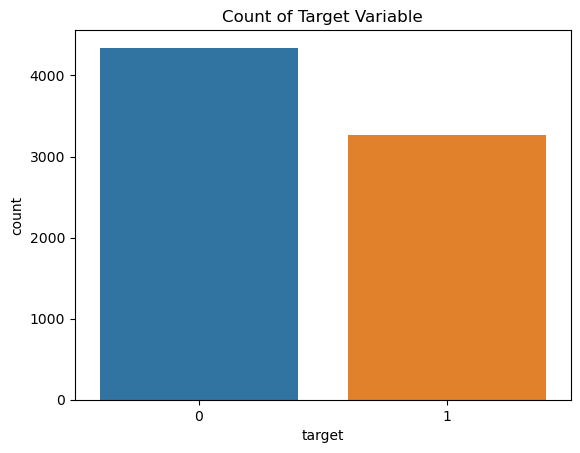

In [8]:
sns.countplot(data=df, x='target')
plt.title("Count of Target Variable")
plt.show()

In [9]:
df['text']=df['text'].apply(lambda x: x.lower())

In [10]:
df['text']=df['text'].apply(lambda x: x.replace("#", ""))

In [11]:
import re

Xóa tag tên:

In [12]:
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+\s*', '', x))

In [13]:
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

In [14]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [15]:
df['text']=df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [16]:
df['text'][5]

'rockyfire update  california hwy  closed in both directions due to lake county fire  cafire wildfires'

In [17]:
#!pip install transformers datasets

In [18]:
!pip install accelerate -U

In [19]:
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, default_data_collator, Trainer, set_seed
set_seed(2023)
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
model = BertForSequenceClassification.from_pretrained('bert-large-uncased')

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly

In [20]:
df['text_lengths'] = df['text'].apply(lambda x: len(x.split()))

max_word_length = df['text_lengths'].max()
min_word_length = df['text_lengths'].min()

df.drop('text_lengths', axis=1, inplace=True)

print("Maximum word length:", max_word_length)
print("Minimum word length:", min_word_length)

Maximum word length: 31
Minimum word length: 1


 Giới hạn ký tự trong một tweet là 280 ký tự, ta lấy trung bình một từ tiếng Anh có 5 ký tự thì sẽ có tối đa 56 từ.

In [21]:
max_word_length=60
df['input_ids']=df['text'].apply(lambda x: tokenizer(x, max_length=max_word_length, padding='max_length')['input_ids'])
df.head(n=10)

,id,text,target,input_ids
0,1,our deeds are the reason of this earthquake ma...,1,"[101, 2256, 15616, 2024, 1996, 3114, 1997, 202..."
1,4,forest fire near la ronge sask canada,1,"[101, 3224, 2543, 2379, 2474, 6902, 3351, 2187..."
2,5,all residents asked to shelter in place are be...,1,"[101, 2035, 3901, 2356, 2000, 7713, 1999, 2173..."
3,6,people receive wildfires evacuation orders in...,1,"[101, 2111, 4374, 3748, 26332, 13982, 4449, 19..."
4,7,just got sent this photo from ruby alaska as s...,1,"[101, 2074, 2288, 2741, 2023, 6302, 2013, 1009..."
5,8,rockyfire update california hwy closed in bo...,1,"[101, 6857, 10273, 10651, 2662, 1044, 18418, 2..."
6,10,flood disaster heavy rain causes flash floodin...,1,"[101, 7186, 7071, 3082, 4542, 5320, 5956, 9451..."
7,13,im on top of the hill and i can see a fire in ...,1,"[101, 10047, 2006, 2327, 1997, 1996, 2940, 199..."
8,14,theres an emergency evacuation happening now i...,1,"[101, 2045, 2015, 2019, 5057, 13982, 6230, 208..."
9,15,im afraid that the tornado is coming to our area,1,"[101, 10047, 4452, 2008, 1996, 11352, 2003, 27..."


In [22]:
df.rename(columns={'target':'labels'}, inplace=True)
df.head()

,id,text,labels,input_ids
0,1,our deeds are the reason of this earthquake ma...,1,"[101, 2256, 15616, 2024, 1996, 3114, 1997, 202..."
1,4,forest fire near la ronge sask canada,1,"[101, 3224, 2543, 2379, 2474, 6902, 3351, 2187..."
2,5,all residents asked to shelter in place are be...,1,"[101, 2035, 3901, 2356, 2000, 7713, 1999, 2173..."
3,6,people receive wildfires evacuation orders in...,1,"[101, 2111, 4374, 3748, 26332, 13982, 4449, 19..."
4,7,just got sent this photo from ruby alaska as s...,1,"[101, 2074, 2288, 2741, 2023, 6302, 2013, 1009..."


In [23]:
df = df[['input_ids', 'labels']]
df.head()

,input_ids,labels
0,"[101, 2256, 15616, 2024, 1996, 3114, 1997, 202...",1
1,"[101, 3224, 2543, 2379, 2474, 6902, 3351, 2187...",1
2,"[101, 2035, 3901, 2356, 2000, 7713, 1999, 2173...",1
3,"[101, 2111, 4374, 3748, 26332, 13982, 4449, 19...",1
4,"[101, 2074, 2288, 2741, 2023, 6302, 2013, 1009...",1


In [24]:
train_df = df[:-int(len(df)*0.01)].reset_index(drop=True)
test_df = df[-int(len(df)*0.01):].reset_index(drop=True)

In [25]:
len(train_df), len(test_df)

(7537, 76)

In [26]:
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

In [27]:
train_ds

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 7537
})

In [28]:
batch_size = 8 #16

args = TrainingArguments(
    'nlp-getting-started',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate=2e-5,
    gradient_accumulation_steps=8,
    num_train_epochs=3,
    warmup_ratio=0.1,
    weight_decay=0.01,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
)

data_collator = default_data_collator
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [29]:
trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 4.00 GiB total capacity; 3.35 GiB already allocated; 0 bytes free; 3.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

In [ ]:
df_submission = pd.read_csv('test.csv')
df_submission.head()

In [ ]:
df_submission['text']=df_submission['text'].apply(lambda x: x.lower())
df_submission['text']=df_submission['text'].apply(lambda x: x.replace("#", ""))
df_submission['text']=df_submission['text'].apply(lambda x: re.sub(r'@\w+\s*', '', x))
df_submission['text']=df_submission['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
df_submission['text']=df_submission['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df_submission['text']=df_submission['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
df_submission['input_ids']=df_submission['text'].apply(lambda x: tokenizer(x, max_length=max_word_length, padding='max_length')['input_ids'])
df_submission.head()

In [ ]:
df_submission=df_submission[['input_ids']]
df_submission.head()

In [ ]:
output_ds = Dataset.from_pandas(df_submission)
output_ds

In [ ]:
outputs=trainer.predict(output_ds)

In [ ]:
outputs.predictions.argmax(1)

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission['target'] = outputs.predictions.argmax(1)
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)